## *Neural Network-Based Bank Customer Churn Prediction*

#### *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### *Data Collection and Preprocessing*

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

#### *Encoding Categorical data*

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1])], remainder='passthrough')
X = ct.fit_transform(X)
X = np.array(X)

In [10]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [11]:
X.shape

(10000, 12)

In [12]:
y.shape

(10000,)

#### *Splitting data into train and test data*

In [13]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### *Handling class imbalance using over-sampling*

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train_1, y_train_1)

print("Before SMOTE:", X_train_1.shape, y_train_1.shape)
print("After SMOTE:", X_train.shape, y_train.shape)

Before SMOTE: (8000, 12) (8000,)
After SMOTE: (12740, 12) (12740,)


#### *Performing Feature Scaling*

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### *Importing tensorflow libraries*

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### *Model Building and Training*

In [18]:
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [19]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping  
from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )
# class_weights = dict(enumerate(class_weights))
# print("Class Weights:", class_weights)

class_weights = {0: 0.8, 1: 1.47}

early_stop = EarlyStopping(
    monitor='val_loss',        # watch validation loss
    patience=5,                 # stop if it doesn’t improve for 5 epochs
    restore_best_weights=True   # go back to the best model
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,       
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7260 - loss: 0.5748 - val_accuracy: 0.8254 - val_loss: 0.4157
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7864 - loss: 0.4770 - val_accuracy: 0.8497 - val_loss: 0.3510
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8024 - loss: 0.4434 - val_accuracy: 0.8316 - val_loss: 0.3796
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8128 - loss: 0.4290 - val_accuracy: 0.8654 - val_loss: 0.3291
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4147 - val_accuracy: 0.8995 - val_loss: 0.2625
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8285 - loss: 0.4048 - val_accuracy: 0.8834 - val_loss: 0.2867
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8310 - loss: 0.3947 - val_accuracy: 0.8626 - val_loss: 0.3130
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8373 - loss: 0.3842 - val_accu

#### *Test data prediction and Threshold tuning*

In [23]:
y_pred = model.predict(X_test).flatten()
y_pred = (y_pred>0.49).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


#### *Evaluating the model's performance*

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1232  361]
 [  96  311]]


0.7715

#### *Analysis of Precision, Recall, and F1 Metrics*

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



#### *Analysis of Precision-Recall Curve and Average Precision*

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


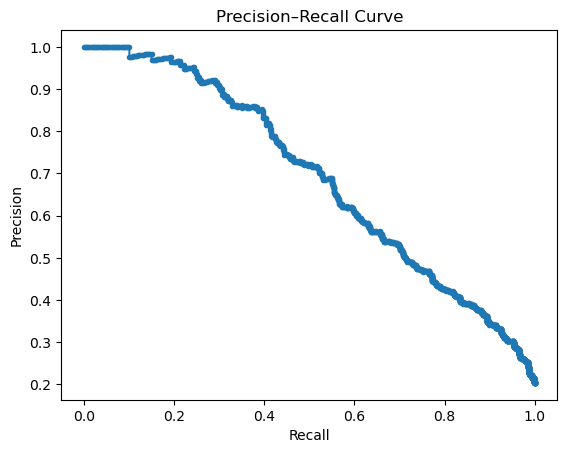

Average Precision (AP): 0.6915115254672242


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = model.predict(X_test).ravel()


# Computing precision, recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()

ap = average_precision_score(y_test, y_scores)
print("Average Precision (AP):", ap)